In [72]:
# Mengekstrak Data Set
# 1. Upload File DataSet.zip ke Direktori
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/Projek Pola/DataCatur.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
print('Done')

Done


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.1736 - loss: 2.2867 - val_accuracy: 0.1622 - val_loss: 1.7744
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2648 - loss: 1.7644 - val_accuracy: 0.2523 - val_loss: 1.7810
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3518 - loss: 1.7172 - val_accuracy: 0.2162 - val_loss: 1.7947
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3531 - loss: 1.6169 - val_accuracy: 0.2883 - val_loss: 1.8223
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4878 - loss: 1.3708 - val_accuracy: 0.2703 - val_loss: 1.8127
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5727 - loss: 1.1966 - val_accuracy: 0.3243 - val_loss: 1.9055
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6224 - loss: 0.9263 - val_accuracy: 0.3423 - val_loss: 2.0943
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7538 - loss: 0.6423 - val_accuracy: 0.3423 - 

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,920,996 (37.85 MB)

 Trainable params: 3,306,998 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,613,998 (25.23 MB)

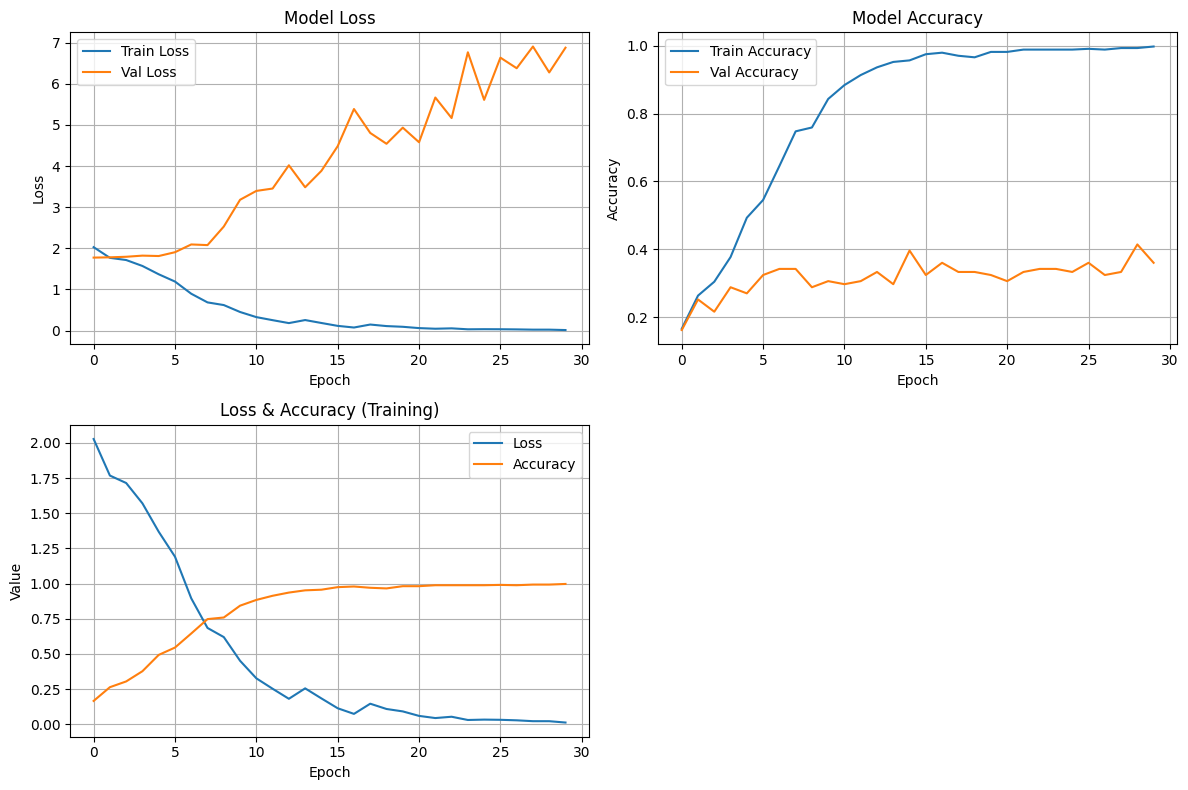

In [83]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Fungsi untuk memuat citra training
def LoadCitraTraining(sDir, LabelKelas):
    JumlahKelas = len(LabelKelas)
    TargetKelas = np.eye(JumlahKelas)
    X = []  # Menampung data citra
    T = []  # Menampung target
    for i in range(JumlahKelas):
        DirKelas = os.path.join(sDir, LabelKelas[i])
        files = os.listdir(DirKelas)
        for f in files:
            ff = f.lower()
            if ff.endswith(('.jpg', '.jpeg', '.png')):
                NmFile = os.path.join(DirKelas, f)
                img = np.double(cv2.imread(NmFile, 1))
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                img = img.astype('float32')
                X.append(img)
                T.append(TargetKelas[i])
    X = np.array(X, dtype='float32')
    T = np.array(T, dtype='float32')
    return X, T

# Fungsi untuk membangun model CNN
def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(JumlahKelas, activation='softmax')(x)
    ModelCNN = Model(inputs=input_img, outputs=x)
    ModelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ModelCNN

# Fungsi untuk training model (SUDAH DITAMBAHKAN AKURASI TRAINING)
def TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, NamaFileBobot='chess.h5'):
    X, D = LoadCitraTraining(DirektoriDataSet, LabelKelas)
    X_train, X_test, D_train, D_test = train_test_split(X, D, test_size=0.2, random_state=42, shuffle=True)
    ModelCNN = ModelDeepLearningCNN(len(LabelKelas))
    history = ModelCNN.fit(X_train, D_train, epochs=JumlahEpoh, shuffle=True, validation_data=(X_test, D_test))

    # Simpan model
    ModelCNN.save(NamaFileBobot)

    # Evaluasi akurasi data training
    train_loss, train_acc = ModelCNN.evaluate(X_train, D_train, verbose=0)
    print(f"Akurasi Data Training: {train_acc * 100:.2f}%")

    # Evaluasi akurasi data testing
    test_loss, test_acc = ModelCNN.evaluate(X_test, D_test, verbose=0)
    print(f"Akurasi Data Testing: {test_acc * 100:.2f}%")

    return ModelCNN, history

# Fungsi untuk klasifikasi gambar
def Klasifikasi(DirDataSet, DirKlasifikasi, LabelKelas, ModelCNN=[]):
    if not ModelCNN:
        ModelCNN = load_model('chess.h5')
    X = []
    ls = []
    DirKelas = os.path.join(DirDataSet, DirKlasifikasi)
    files = os.listdir(DirKelas)
    for f in files:
        ff = f.lower()
        if ff.endswith(('.jpg', '.jpeg', '.png')):
            ls.append(ff)
            NmFile = os.path.join(DirKelas, f)
            img = cv2.imread(NmFile, 1)
            img = cv2.resize(img, (128, 128))
            img = img / 255.0
            img = img.astype('float32')
            X.append(img)
    X = np.array(X, dtype='float32')
    hs = ModelCNN.predict(X)
    LKlasifikasi = []
    LKelasCitra = []
    for i in range(X.shape[0]):
        v = hs[i, :]
        if v.max() > 0.5:
            idx = np.argmax(v)
            LKelasCitra.append(LabelKelas[idx])
        else:
            idx = -1
            LKelasCitra.append("-")
        LKlasifikasi.append(idx)
    return ls, hs, LKelasCitra

#***********************
# Program Utama
#***********************

# Direktori dataset
DirektoriDataSet = "/content/Chessman-image-dataset/Chess"

# Label Data Set
LabelKelas = ("Bishop", "King", "Knight", "Pawn", "Queen", "Rook")

# Parameter training
JumlahEpoh = 30
FileBobot = "chess.h5"

# Training model
ModelCNN, history = TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, FileBobot)

# Menampilkan struktur model
ModelCNN.summary()

# Membuat layout 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Grafik 1: Loss
axs[0, 0].plot(history.history['loss'], label='Train Loss')
axs[0, 0].plot(history.history['val_loss'], label='Val Loss')
axs[0, 0].set_title('Model Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Grafik 2: Accuracy
axs[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axs[0, 1].set_title('Model Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Grafik 3: Gabungan Loss & Accuracy
axs[1, 0].plot(history.history['loss'], label='Loss')
axs[1, 0].plot(history.history['accuracy'], label='Accuracy')
axs[1, 0].set_title('Loss & Accuracy (Training)')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Value')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Grafik 4: Kosong
axs[1, 1].axis('off')

# Tampilkan grafik
plt.tight_layout()
plt.show()



Kelas: Bishop


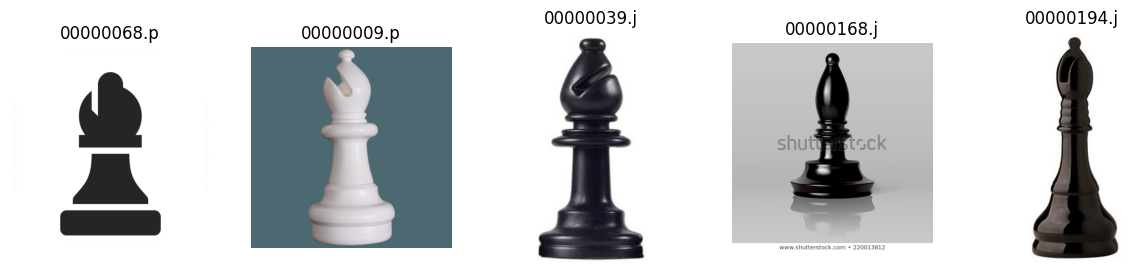


Kelas: King


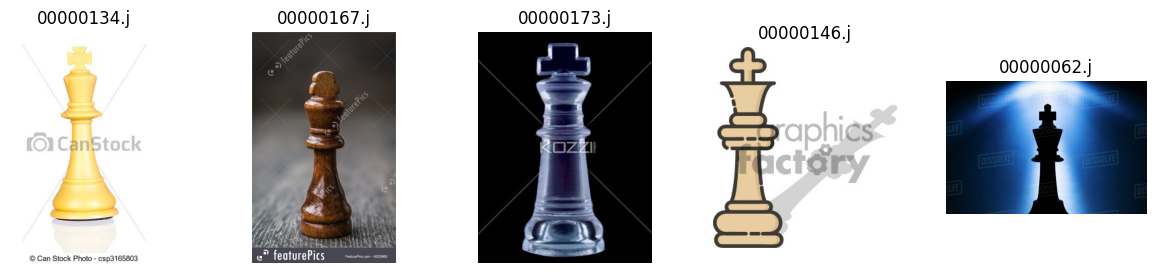


Kelas: Knight


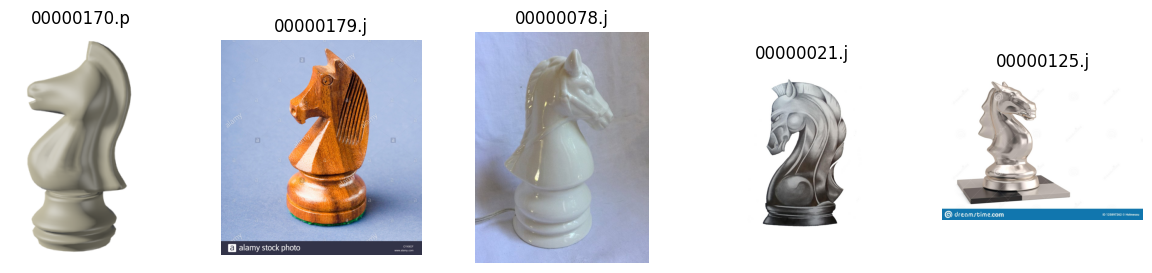


Kelas: Pawn


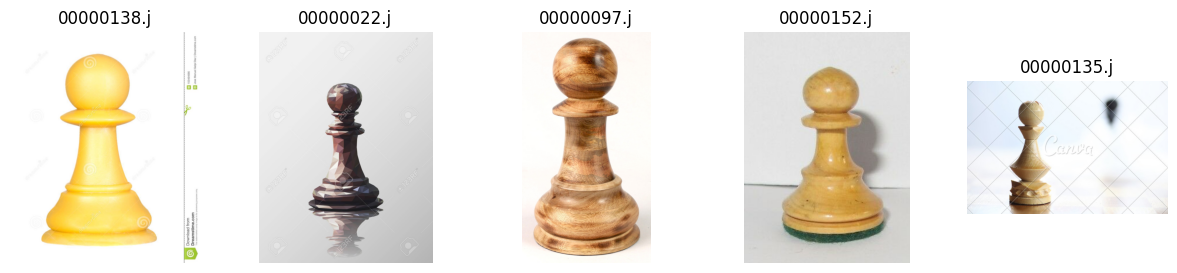


Kelas: Queen


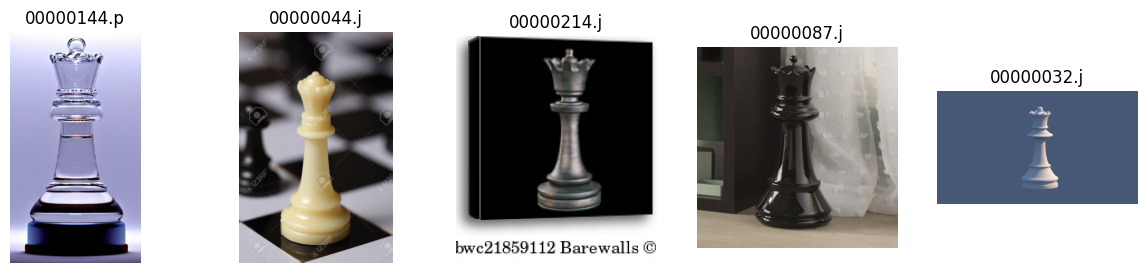


Kelas: Rook


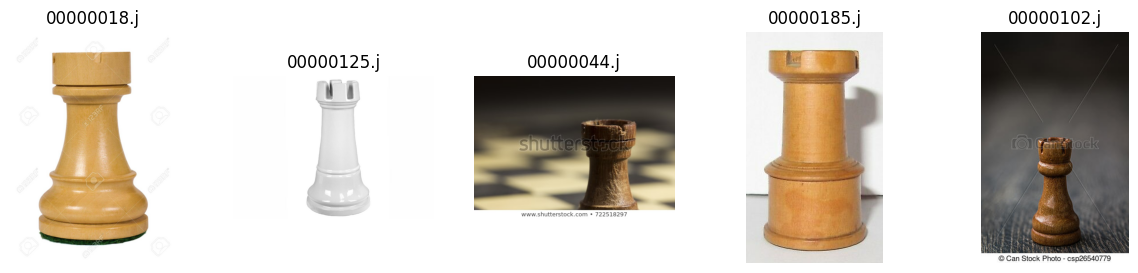

In [87]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path ke dataset
base_dir = "/content/Chessman-image-dataset/Chess"
label_kelas = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

# Menampilkan 5 gambar dari setiap kelas
for kelas in label_kelas:
    folder_path = os.path.join(base_dir, kelas)
    all_images = os.listdir(folder_path)
    sample_images = random.sample(all_images, 5)  # ambil 5 gambar acak

    print(f"\nKelas: {kelas}")
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(img_name[:10])
        plt.axis('off')
    plt.show()

Saving Rook.jpg to Rook (8).jpg


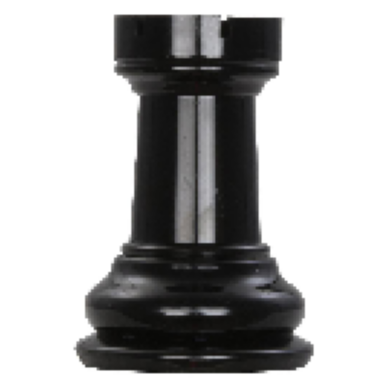

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Rook (8).jpg => Bidak terprediksi: Rook (100.00%)


In [88]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model CNN kamu (pastikan file model sudah diupload)
# Ganti 'nama_model.h5' dengan nama file model warna kamu
ModelCNN = load_model('chess.h5')

# Label kelas
base_dir = "/content/Chessman-image-dataset/Chess"
label_kelas = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

# Upload gambar
uploaded = files.upload()

for fn in uploaded.keys():
    # Load dan tampilkan gambar
    path = fn
    img = image.load_img(path, target_size=(128, 128))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Pra-pemrosesan gambar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi

    # Prediksi
    classes = ModelCNN.predict(x)
    pred_idx = np.argmax(classes[0])         # Ambil indeks dengan nilai tertinggi
    pred_label = LabelKelas[pred_idx]        # Konversi ke nama warna
    confidence = np.max(classes[0]) * 100    # Persentase confidence

    # Output hasil
    print(f"{fn} => Bidak terprediksi: {pred_label} ({confidence:.2f}%)")

In [89]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [91]:
import anvil.server

In [92]:
anvil.server.connect("server_GMD7IDFZMA37BW32TJJADPPK-EA4XA3PZ3ODAATPE")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [93]:
import anvil.server
import anvil.media
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

ModelCNN = load_model('chess.h5')

# Label kelas sesuai urutan output model
LabelKelas = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        img = load_img(f, target_size=(128, 128))  # Sesuaikan jika model pakai ukuran lain
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        prediction = ModelCNN.predict(img_array)
        pred_index = np.argmax(prediction[0])
        pred_label = LabelKelas[pred_index]

        return pred_label

In [94]:
anvil.server.wait_forever()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


KeyboardInterrupt: 